<a href="https://colab.research.google.com/github/Somo2323/LungCancer_prediction/blob/main/LungCancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib pandas seaborn keras

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import os

os.environ['KAGGLE_USERNAME'] = "jinattaf"
os.environ['KAGGLE_KEY'] = "fb942f74b014b687e5dbbc015b799034"

In [5]:
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors
100% 198M/199M [00:03<00:00, 118MB/s] 
100% 199M/199M [00:03<00:00, 69.2MB/s]


In [6]:
!unzip iqothnccd-lung-cancer-dataset.zip -d /content/

Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: /content/Test cases/000001_03_01_088.png  
  inflating: /content/Test cases/000017_02_01_016.png  
  inflating: /content/Test cases/000019_01_01_021.png  
  inflating: /content/Test cases/000019_02_01_025.png  
  inflating: /content/Test cases/000019_03_01_025.png  
  inflating: /content/Test cases/000020_01_01_066.png  
  inflating: /content/Test cases/000020_02_01_062.png  
  inflating: /content/Test cases/000020_03_01_134.png  
  inflating: /content/Test cases/000020_03_01_166.png  
  inflating: /content/Test cases/000020_03_01_212.png  
  inflating: /content/Test cases/000020_04_01_116.png  
  inflating: /content/Test cases/000020_04_01_143.png  
  inflating: /content/Test cases/000020_04_01_159.png  
  inflating: /content/Test cases/000021_01_01_016.png  
  inflating: /content/Test cases/000021_02_01_068.png  
  inflating: /content/Test cases/000021_03_01_012.png  
  inflating: /content/Test cases/000021_03_01_017.png  
  in

### Training Image Preprocessing


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset',
    validation_split=0.2,  # 20% of data will be used for validation
    subset="validation",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    seed=123,
    image_size=(512, 512),
    batch_size=16,
)


Found 1097 files belonging to 3 classes.
Using 219 files for validation.


### Vadidaion Image Preprocessing

In [8]:
# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset',
    validation_split=0.2,  # 20% of data will be used for validation
    subset="validation",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    seed=123,
    image_size=(512, 512),
    batch_size=16,
)


Found 1097 files belonging to 3 classes.
Using 219 files for validation.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [10]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  ...

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]]


 [[[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]]

  [[38. 38. 38.]
   [38. 38. 38.]
   [38. 38. 38.]
   ...
   [38. 38. 38.]
   [38. 38. 38.]


### Build Model

In [11]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[512,512,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
# output layer
model.add(Dense(units=3,activation='softmax'))

### Compiling Model

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 510, 510, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 255, 255, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                   

### Model Training

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
14/14 [==============================] - 726s 53s/step - loss: 6.8833 - accuracy: 0.4201 - val_loss: 1.0183 - val_accuracy: 0.3425
Epoch 2/10
14/14 [==============================] - 767s 54s/step - loss: 0.9655 - accuracy: 0.5251 - val_loss: 0.9415 - val_accuracy: 0.6347
Epoch 3/10
14/14 [==============================] - 696s 50s/step - loss: 0.8969 - accuracy: 0.6210 - val_loss: 0.8145 - val_accuracy: 0.7078
Epoch 4/10
14/14 [==============================] - 668s 48s/step - loss: 0.7728 - accuracy: 0.6667 - val_loss: 0.6827 - val_accuracy: 0.7123
Epoch 5/10
14/14 [==============================] - 663s 48s/step - loss: 0.6849 - accuracy: 0.7123 - val_loss: 0.6218 - val_accuracy: 0.7443
Epoch 6/10
14/14 [==============================] - 658s 48s/step - loss: 0.5741 - accuracy: 0.7580 - val_loss: 0.4551 - val_accuracy: 0.8219
Epoch 7/10
14/14 [==============================] - 661s 48s/step - loss: 0.4365 - accuracy: 0.8265 - val_loss: 0.4709 - val_accuracy: 0.8539
Epoch 

### Model Evaluation

In [26]:
train_loss,train_acc = model.evaluate(training_set)

14/14 [==============================] - 143s 10s/step - loss: 0.1095 - accuracy: 0.9772


In [27]:
print(train_loss,train_acc)

0.10953342169523239 0.9771689772605896


In [28]:
val_loss,val_acc = model.evaluate(validation_set)

14/14 [==============================] - 141s 10s/step - loss: 0.1095 - accuracy: 0.9772


In [29]:
print(val_loss,val_acc)

0.10953344404697418 0.9771689772605896


### Save Model

In [30]:
model.save("trained_model.keras")

In [31]:
training_history.history

{'loss': [6.883308410644531,
  0.9655188918113708,
  0.8968635201454163,
  0.7727606296539307,
  0.6848534941673279,
  0.5740901827812195,
  0.4364745020866394,
  0.3860514760017395,
  0.26942506432533264,
  0.256470263004303],
 'accuracy': [0.42009133100509644,
  0.5251141786575317,
  0.621004581451416,
  0.6666666865348816,
  0.7123287916183472,
  0.7579908967018127,
  0.8264840245246887,
  0.8630136847496033,
  0.9041095972061157,
  0.9086757898330688],
 'val_loss': [1.0182968378067017,
  0.9415333867073059,
  0.8144925832748413,
  0.6827379465103149,
  0.6217817068099976,
  0.4551374614238739,
  0.47088244557380676,
  0.32053759694099426,
  0.23209936916828156,
  0.10953342169523239],
 'val_accuracy': [0.34246575832366943,
  0.6347032189369202,
  0.7077625393867493,
  0.7123287916183472,
  0.7442922592163086,
  0.8219178318977356,
  0.853881299495697,
  0.9178082346916199,
  0.9634703397750854,
  0.9771689772605896]}

In [32]:
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history, f)

In [35]:
training_history.history['val_accuracy']

[0.34246575832366943,
 0.6347032189369202,
 0.7077625393867493,
 0.7123287916183472,
 0.7442922592163086,
 0.8219178318977356,
 0.853881299495697,
 0.9178082346916199,
 0.9634703397750854,
 0.9771689772605896]

In [37]:
training_history.history['accuracy']

[0.42009133100509644,
 0.5251141786575317,
 0.621004581451416,
 0.6666666865348816,
 0.7123287916183472,
 0.7579908967018127,
 0.8264840245246887,
 0.8630136847496033,
 0.9041095972061157,
 0.9086757898330688]

### Accuracy Visualization


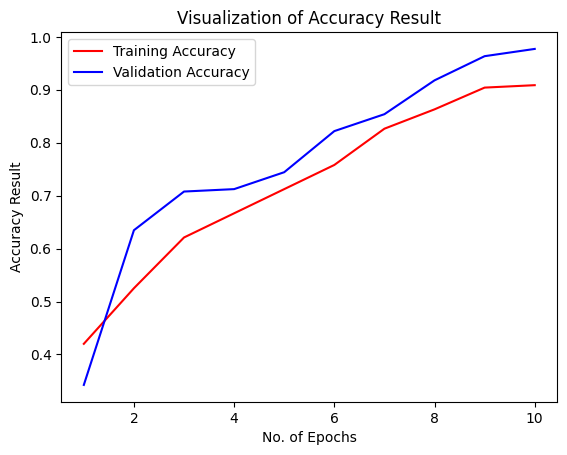

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Metrics for Model evaluation

In [40]:
class_name = validation_set.class_names
class_name

['Bengin cases', 'Malignant cases', 'Normal cases']

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset',
    validation_split=0.2,
    subset="validation",
    labels="inferred",
    shuffle=False,
    label_mode="categorical",
    color_mode="rgb",
    seed=123,
    image_size=(512, 512),
    batch_size=16,
)

Found 1097 files belonging to 3 classes.
Using 219 files for validation.


In [43]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

14/14 [==============================] - 142s 10s/step


(array([[7.71106556e-02, 1.43900186e-01, 7.78989077e-01],
        [6.54126853e-02, 1.66476429e-01, 7.68110931e-01],
        [5.26378155e-02, 2.13640109e-01, 7.33722091e-01],
        [1.00543946e-01, 4.92562950e-01, 4.06892955e-01],
        [8.26618597e-02, 2.99069397e-02, 8.87431145e-01],
        [8.22724849e-02, 2.98385825e-02, 8.87888968e-01],
        [5.93919978e-02, 2.34613400e-02, 9.17146564e-01],
        [4.34072241e-02, 1.52497003e-02, 9.41343188e-01],
        [4.08992954e-02, 1.50335813e-02, 9.44067061e-01],
        [4.00579460e-02, 1.44382473e-02, 9.45503712e-01],
        [4.12032567e-02, 1.45031102e-02, 9.44293618e-01],
        [4.19005007e-02, 1.57328174e-02, 9.42366660e-01],
        [3.60880569e-02, 1.81852095e-02, 9.45726693e-01],
        [4.26038690e-02, 2.45260578e-02, 9.32870030e-01],
        [2.13678498e-02, 6.82899535e-01, 2.95732588e-01],
        [4.09363285e-02, 2.91192029e-02, 9.29944456e-01],
        [7.00479895e-02, 2.65155762e-01, 6.64796174e-01],
        [7.865

In [44]:
predicted_categories  = tf.argmax(y_pred,axis=1)

In [45]:
predicted_categories

<tf.Tensor: shape=(219,), dtype=int64, numpy=
array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [46]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(219, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
     

In [47]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(219,), dtype=int64, numpy=
array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                 precision    recall  f1-score   support

   Bengin cases       0.00      0.00      0.00         0
Malignant cases       0.00      0.00      0.00         0
   Normal cases       1.00      0.85      0.92       219

       accuracy                           0.85       219
      macro avg       0.33      0.28      0.31       219
   weighted avg       1.00      0.85      0.92       219



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[  0,   0,   0],
       [  0,   0,   0],
       [ 21,  11, 187]])

### ConfusionMatrix Visualization

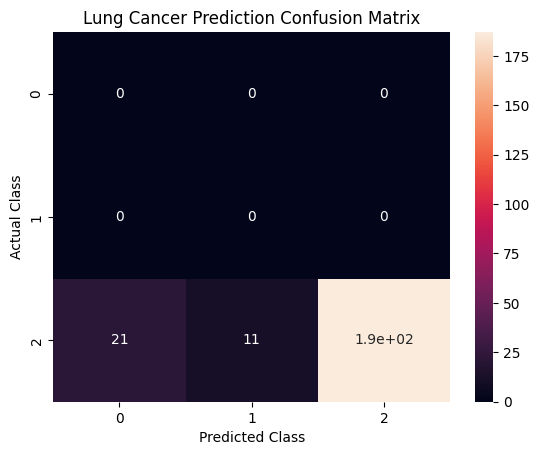

In [71]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Lung Cancer Prediction Confusion Matrix")
plt.show()